In [1]:
%pip install pandas numpy matplotlib seaborn plotly scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import zipfile
import pandas as pd
import os

# Path to the ZIP file
zip_path = r"d:\individual+household+electric+power+consumption.zip"
extract_to = r"d:\extracted"

# 1. Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# 2. Find the extracted TXT file (assumes there's only one .txt file)
txt_files = [file for file in os.listdir(extract_to) if file.endswith('.txt')]
if not txt_files:
    raise FileNotFoundError("No .txt file found in the extracted folder.")

txt_path = os.path.join(extract_to, txt_files[0])
print(f"Reading data from: {txt_path}")

# 3. Read the TXT file (semicolon-separated, '?' as NA)
df = pd.read_csv(txt_path, sep=';', low_memory=False, na_values='?')

# 4. Save as CSV in the same 'extracted' directory
csv_path = os.path.join(extract_to, 'RawData.csv')
df.to_csv(csv_path, index=False)

print(f"CSV file saved to: {csv_path}")

Reading data from: d:\extracted\household_power_consumption.txt
CSV file saved to: d:\extracted\RawData.csv


In [3]:
import pandas as pd

# Use raw string to avoid escape issues
file_path = r"d:\extracted\RawData.csv"

# Load the CSV
df = pd.read_csv(file_path)

# Show the first 5 rows
display(df.head())

# memory usage
print(df.info(memory_usage='deep'))

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 338.3 MB
None


In [4]:
original_shape = df.shape
df.dropna(inplace=True)
new_shape = df.shape

difference = original_shape[0] - new_shape[0]

print(f"Original shape: {original_shape}")
print(f"New shape: {new_shape}")
print(f"Difference in rows after dropping NaN values: {difference}")

Original shape: (2075259, 9)
New shape: (2049280, 9)
Difference in rows after dropping NaN values: 25979


In [5]:
# Data Preprocessing :
# Parse 'Date' and 'Time' separately # Convert Data and Time from Object to Integer datatype for the machine to understand

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Convert 'Time' from string to datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Combine 'Date' and 'Time' into one datetime column
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Set as index (optional but useful)
df.set_index('Datetime', inplace=True)

# Extract features from datetime
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Weekday'] = df.index.day_name()
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute

df.drop(columns=['Date', 'Time'], inplace=True)

In [6]:
# Extract features from the datetime column
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Weekday'] = df.index.day_name()  # This will give the name of the weekday
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute

# Display the DataFrame to check the new columns
print(df.head())


                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [7]:
null_counts = df.isnull().sum()
not_null_counts = df.notnull().sum()

pd.DataFrame({
    'Not Null': not_null_counts,
    'Null': null_counts
})

,Not Null,Null
Global_active_power,2049280,0
Global_reactive_power,2049280,0
Voltage,2049280,0
Global_intensity,2049280,0
Sub_metering_1,2049280,0
Sub_metering_2,2049280,0
Sub_metering_3,2049280,0
Year,2049280,0
Month,2049280,0
Day,2049280,0


In [8]:
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Year                   int32  
 8   Month                  int32  
 9   Day                    int32  
 10  Weekday                object 
 11  Hour                   int32  
 12  Minute                 int32  
dtypes: float64(7), int32(5), object(1)
memory usage: 179.8+ MB


In [9]:
# One-hot encode the 'Weekday' column
df = pd.get_dummies(df, columns=['Weekday'], drop_first=False)

# Check updated DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Year                   int32  
 8   Month                  int32  
 9   Day                    int32  
 10  Hour                   int32  
 11  Minute                 int32  
 12  Weekday_Friday         bool   
 13  Weekday_Monday         bool   
 14  Weekday_Saturday       bool   
 15  Weekday_Sunday         bool   
 16  Weekday_Thursday       bool   
 17  Weekday_Tuesday        bool   
 18  Weekday_Wednesday      bool   
dtypes: bool(7), float64(7), int32(5)
memory usage: 177.8 MB
None


In [10]:
df.to_csv(r'd:\extracted\clean_data.csv', index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


In [11]:
#Convert Boolean to Integers (0 or 1): Before saving, convert all those Weekday_* columns to integers:
# Convert all bool columns to integers (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Confirm change
print(df[bool_cols].dtypes)

Weekday_Friday       int64
Weekday_Monday       int64
Weekday_Saturday     int64
Weekday_Sunday       int64
Weekday_Thursday     int64
Weekday_Tuesday      int64
Weekday_Wednesday    int64
dtype: object


In [12]:
df.to_csv(r'd:\extracted\readydata.csv', index=False)
print("Cleaned & numeric dataset saved")

Cleaned & numeric dataset saved


In [13]:
# Calculate IQR for the columns of interest
# Columns to check for outliers
cols_to_check = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Dictionary to hold outliers
outliers = {}

for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Store the outliers for each column
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Print how many outliers are in each column
for col in outliers:
    print(f"Outliers in {col}: {outliers[col].shape[0]} rows")


Outliers in Global_active_power: 94907 rows
Outliers in Global_reactive_power: 40420 rows
Outliers in Voltage: 51067 rows
Outliers in Global_intensity: 100961 rows
Outliers in Sub_metering_1: 169105 rows
Outliers in Sub_metering_2: 77151 rows
Outliers in Sub_metering_3: 0 rows


In [14]:
# Concatenate all outlier DataFrames
all_outliers = pd.concat(outliers.values())

# Drop duplicate rows (based on index)
unique_outlier_rows = all_outliers[~all_outliers.index.duplicated()]

# Total number of unique rows that are outliers in at least one column
print(f"Total unique outlier rows: {unique_outlier_rows.shape[0]}")

Total unique outlier rows: 310113


In [15]:
# Total rows in the original dataset
total_rows = df.shape[0]

# Number of unique outlier rows
outlier_count = unique_outlier_rows.shape[0]

# Calculate percentage
outlier_percent = (outlier_count / total_rows) * 100

print(f"Outliers: {outlier_count} rows out of {total_rows} ({outlier_percent:.2f}%)")

Outliers: 310113 rows out of 2049280 (15.13%)


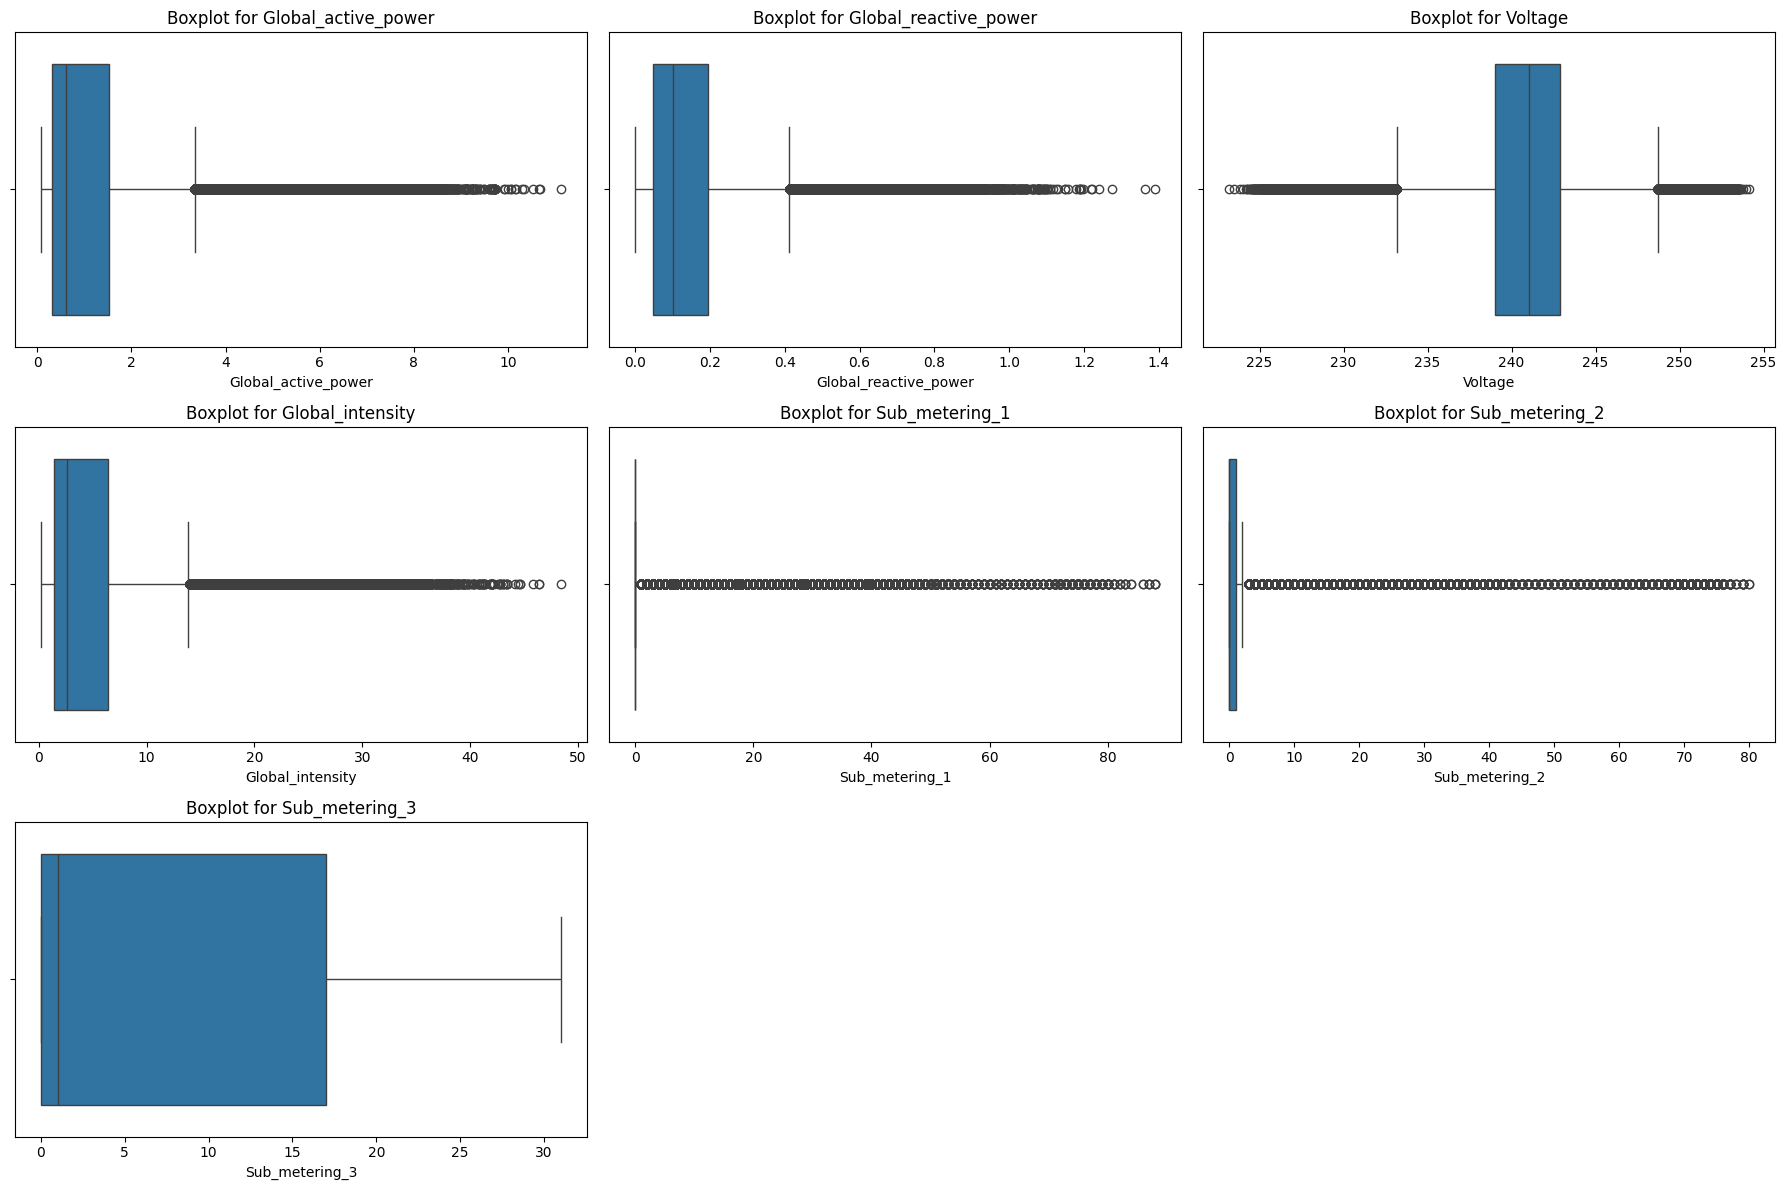

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns of interest (7 columns)
cols_to_check = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity',
                 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Create a boxplot for each column of interest
plt.figure(figsize=(18, 12))  # Increase the figure size for better clarity
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(3, 3, i)  # 3 rows x 3 columns of subplots
    sns.boxplot(x=df[col])  # ← Use df here
    plt.title(f'Boxplot for {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

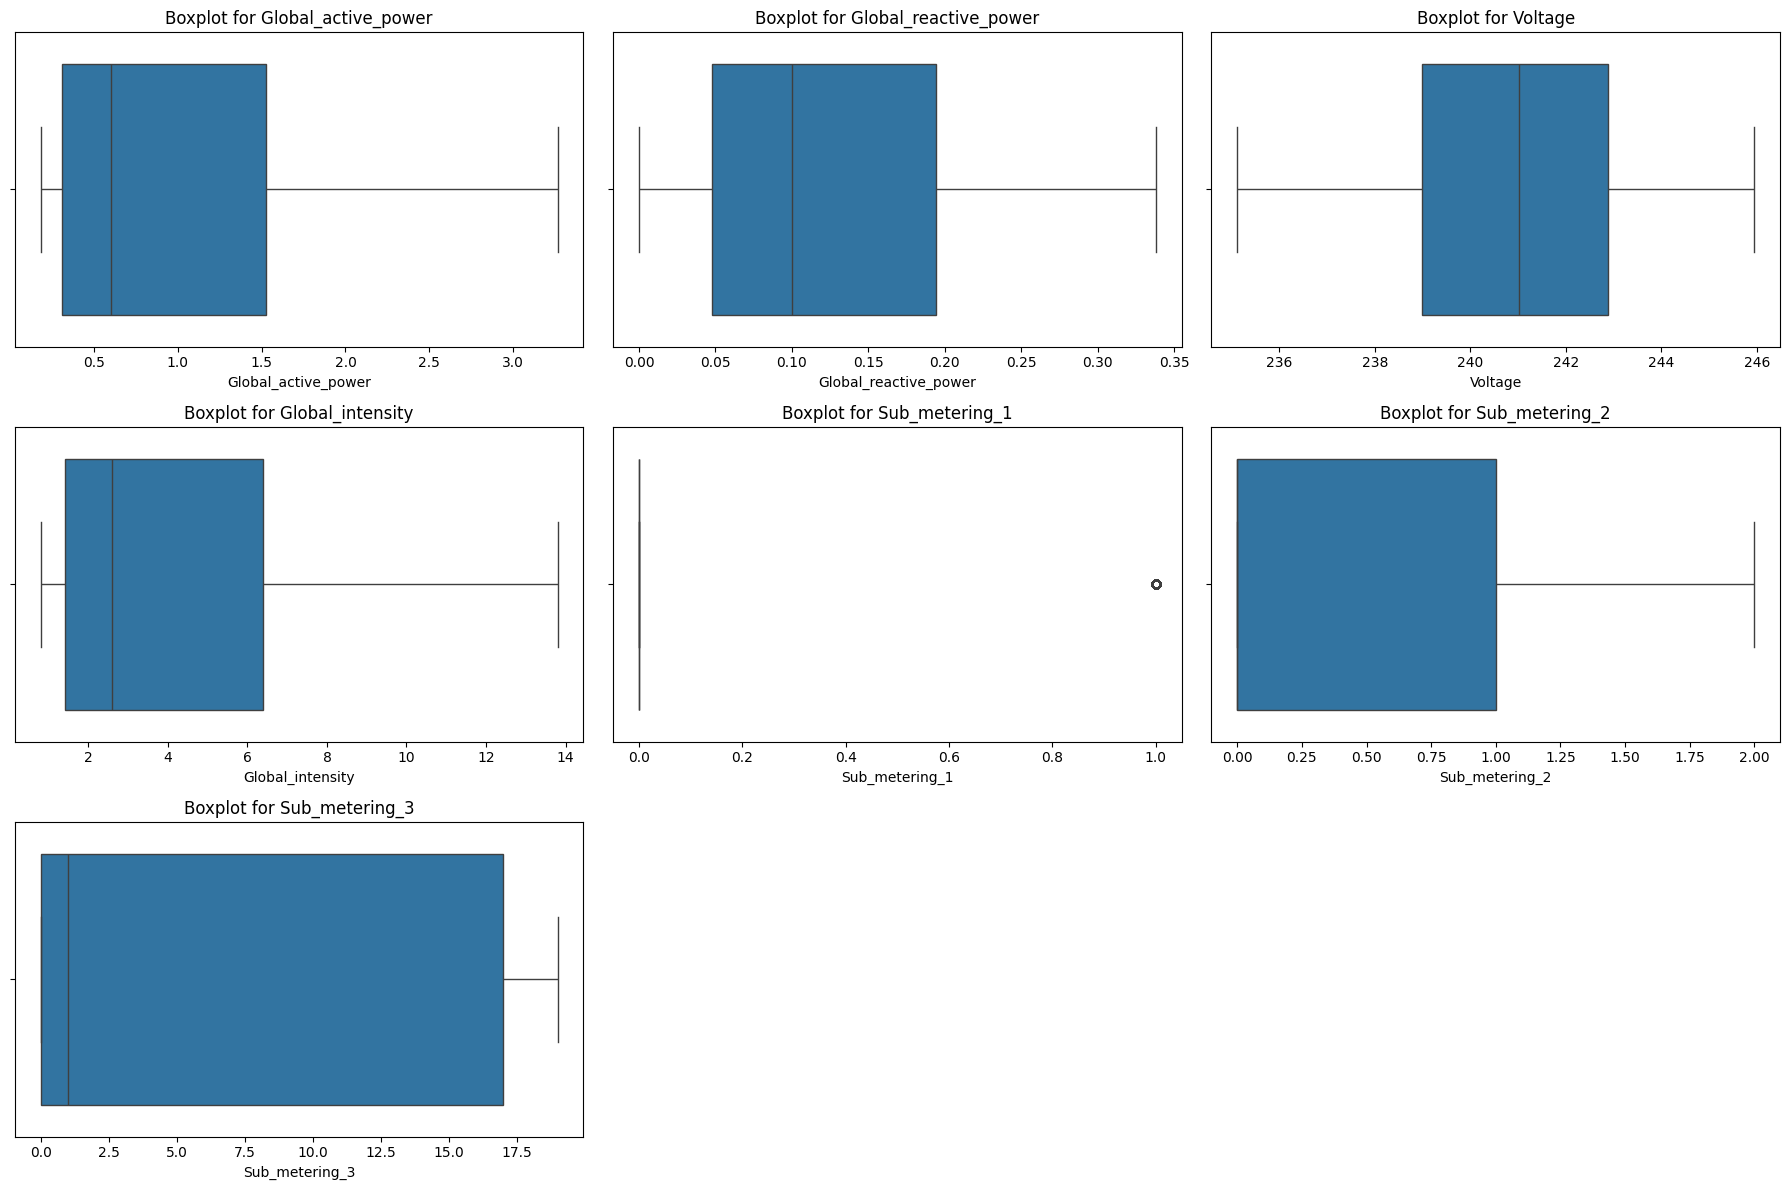

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to cap outliers for any column using percentiles
def cap_outliers(df, column_name, lower_percentile=0.05, upper_percentile=0.95):
    # Calculate the lower and upper percentiles
    lower_threshold = df[column_name].quantile(lower_percentile)
    upper_threshold = df[column_name].quantile(upper_percentile)

    # Cap outliers: Values below lower threshold are replaced with the lower threshold
    # Values above upper threshold are replaced with the upper threshold
    df[column_name] = np.where(
        df[column_name] < lower_threshold, lower_threshold,  # Cap lower outliers
        np.where(df[column_name] > upper_threshold, upper_threshold, df[column_name])  # Cap upper outliers
    )

# Apply capping for columns of interest (make sure to use df instead of Filtered_data)
cols_to_cap = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in cols_to_cap:
    cap_outliers(df, col)

# Visualize the results after capping
plt.figure(figsize=(18, 12))
for i, col in enumerate(cols_to_cap, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])  # Now using df
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [18]:
print(df['Sub_metering_1'].describe())

count    2.049280e+06
mean     8.251923e-02
std      2.751542e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Sub_metering_1, dtype: float64


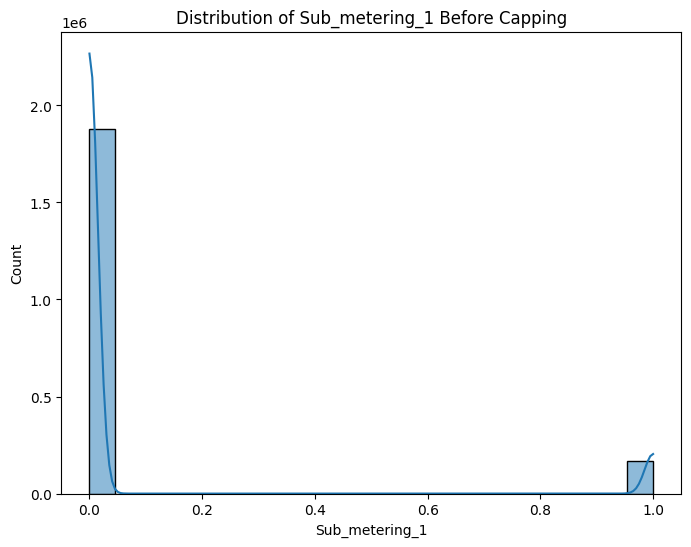

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Sub_metering_1'], kde=True)
plt.title("Distribution of Sub_metering_1 Before Capping")
plt.show()


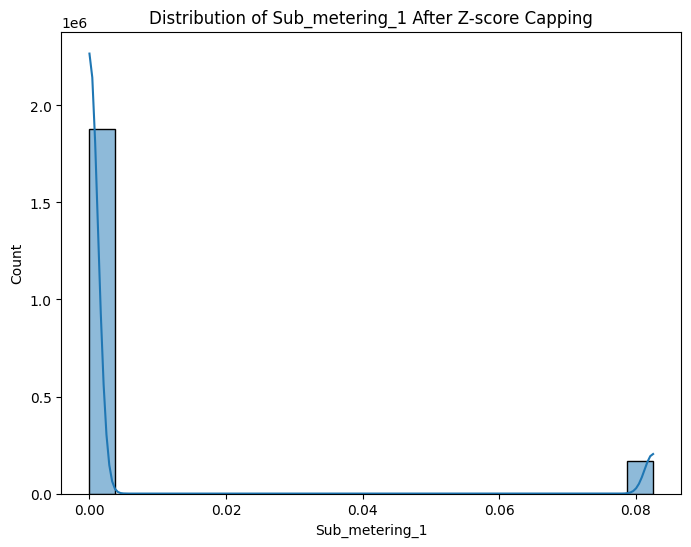

In [20]:
from scipy import stats

def cap_outliers_zscore(df, column_name, threshold=3):
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(df[column_name]))
    
    # Cap values where z-score is higher than threshold
    df[column_name] = np.where(z_scores > threshold, df[column_name].mean(), df[column_name])

# Apply the Z-score capping for `Sub_metering_1`
cap_outliers_zscore(df, 'Sub_metering_1')

# Check the distribution after capping
plt.figure(figsize=(8, 6))
sns.histplot(df['Sub_metering_1'], kde=True)
plt.title("Distribution of Sub_metering_1 After Z-score Capping")
plt.show()

In [21]:
# List of columns you're interested in
cols_to_check = ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Print the mean for each of these columns
for col in cols_to_check:
    mean_value = df[col].mean()
    print(f"Mean of {col}: {mean_value}")

Mean of Global_active_power: 1.0455588977592125
Mean of Global_reactive_power: 0.11945949699406624
Mean of Voltage: 240.8609040833854
Mean of Global_intensity: 4.431430746408491
Mean of Sub_metering_1: 0.006809422703346947
Mean of Sub_metering_2: 0.41315779200499686
Mean of Sub_metering_3: 6.370193921767645


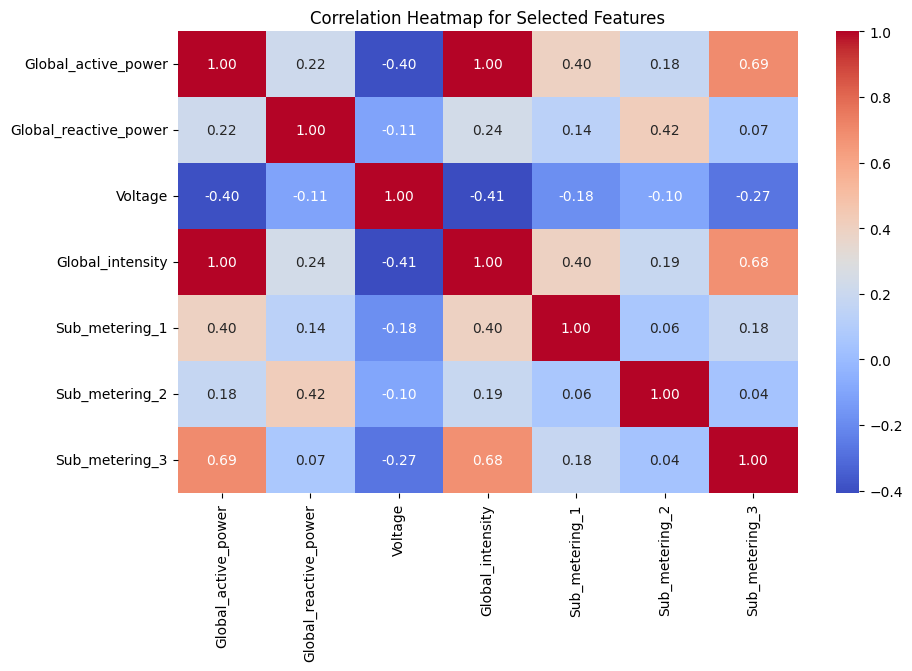

In [22]:
# Correlation Heatmap for selected columns
selected_cols = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity', 
                 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

In [23]:
# Check skewness for each column
skewness = df[cols_to_cap].skew()

# Display skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
Global_active_power      1.023957
Global_reactive_power    0.608798
Voltage                 -0.199968
Global_intensity         1.054808
Sub_metering_1           3.034525
Sub_metering_2           1.375067
Sub_metering_3           0.663739
dtype: float64


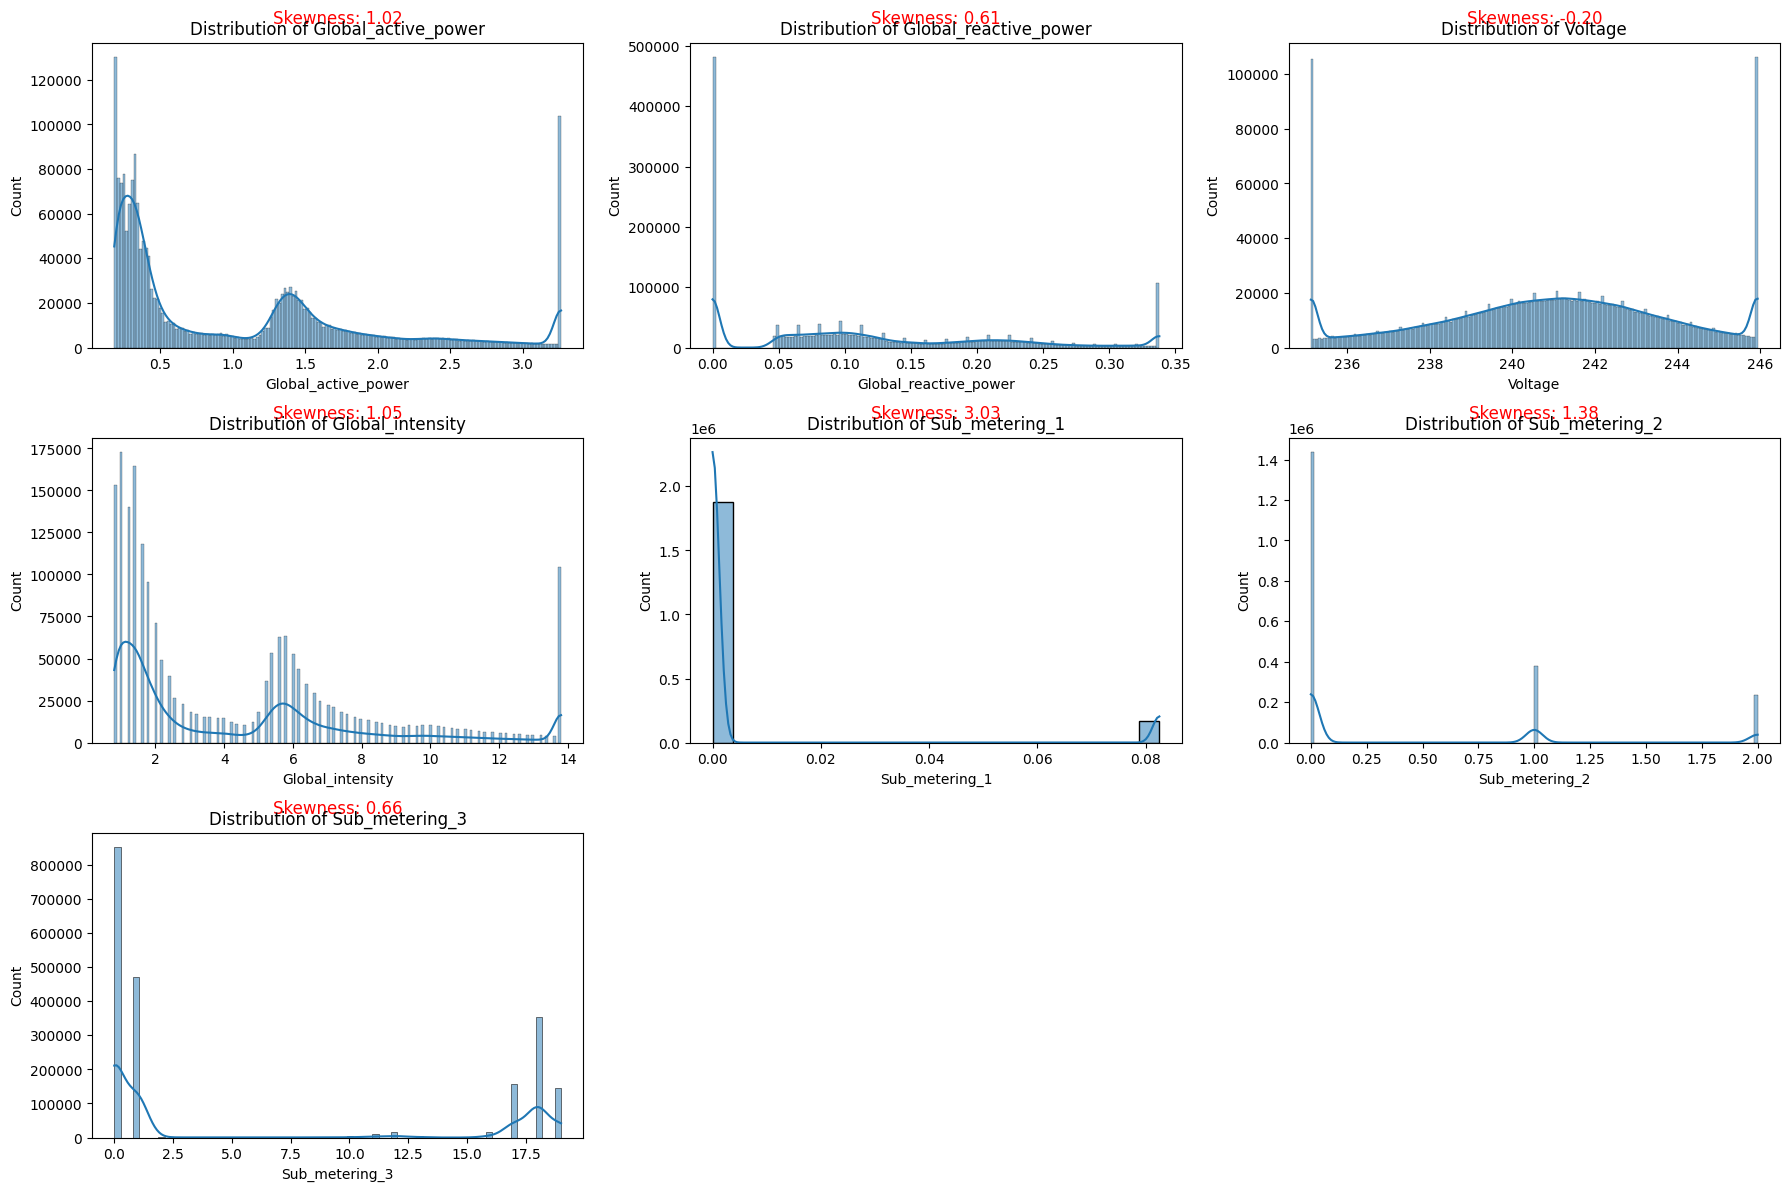

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the size of the plot grid (3 rows, 3 columns)
plt.figure(figsize=(18, 12))

# List of columns to visualize skewness for
cols_to_cap = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Calculate the skewness for each column
skewness_values = df[cols_to_cap].skew()

# Loop through each column and plot its distribution
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns, plot index
    sns.histplot(df[col], kde=True)  # KDE adds a smooth curve to see skewness
    plt.title(f'Distribution of {col}')

    # Annotate skewness value above the plot
    skew_value = skewness_values[col]
    plt.text(0.5, 1.05, f'Skewness: {skew_value:.2f}', horizontalalignment='center', verticalalignment='bottom',
             transform=plt.gca().transAxes, fontsize=12, color='red')

# Tighten layout to ensure proper spacing between plots
plt.tight_layout()
plt.show()

In [25]:
# Scaling 
from sklearn.preprocessing import StandardScaler

# Columns to scale
feature_cols = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

#Apply scaling directly on df
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Save the scaled DataFrame
scaled_path = r'd:\extracted\scaled_data.csv'
df.to_csv(scaled_path, index=False)

print(f"Successfully scaled and saved to: {scaled_path}")

Successfully scaled and saved to: d:\extracted\scaled_data.csv


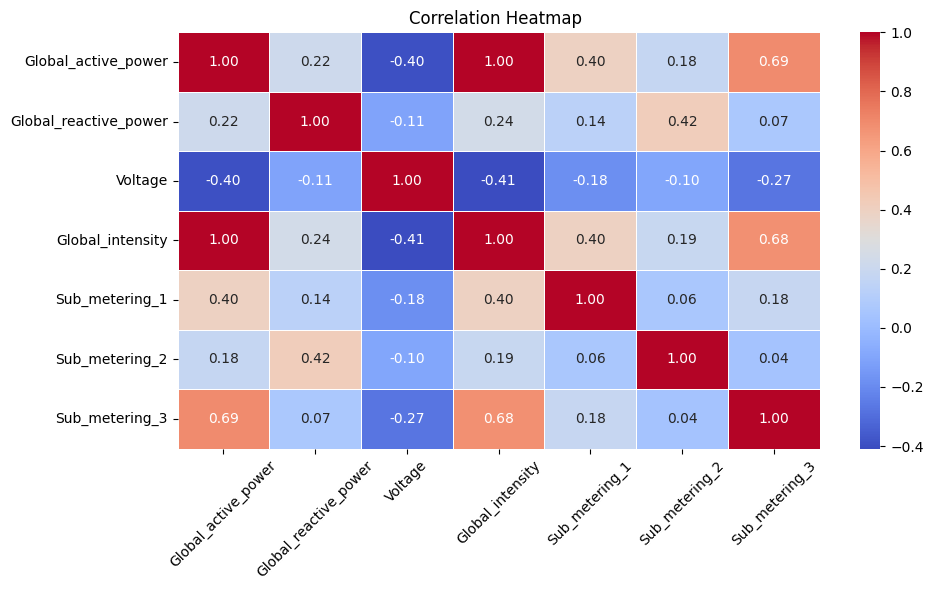

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns of interest
feature_cols = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Correlation heatmap after scaling
plt.figure(figsize=(10, 6))
sns.heatmap(df[feature_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap ')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Linear Regression:
→ RMSE: 0.0420
→ MAE: 0.0267
→ R²: 0.9982

Ridge Regression:
→ RMSE: 0.0420
→ MAE: 0.0267
→ R²: 0.9982

Lasso Regression:
→ RMSE: 0.0466
→ MAE: 0.0308
→ R²: 0.9978

K-Nearest Neighbors:
→ RMSE: 0.2024
→ MAE: 0.1178
→ R²: 0.9590

Decision Tree:
→ RMSE: 0.0384
→ MAE: 0.0146
→ R²: 0.9985

Random Forest:
→ RMSE: 0.0278
→ MAE: 0.0116
→ R²: 0.9992

 Model Comparison:


,Model,RMSE,MAE,R2
5,Random Forest,0.027777,0.011598,0.999229
4,Decision Tree,0.038436,0.014614,0.998523
1,Ridge Regression,0.041951,0.026743,0.998240
0,Linear Regression,0.041951,0.026743,0.998240
2,Lasso Regression,0.046580,0.030842,0.997831
3,K-Nearest Neighbors,0.202396,0.117809,0.959041


C:\Users\ASHWINI MURALIDHARAN\AppData\Local\Temp\ipykernel_37724\4251225326.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='RMSE', y='Model', palette='coolwarm')
C:\Users\ASHWINI MURALIDHARAN\AppData\Local\Temp\ipykernel_37724\4251225326.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='R2', y='Model', palette='magma')


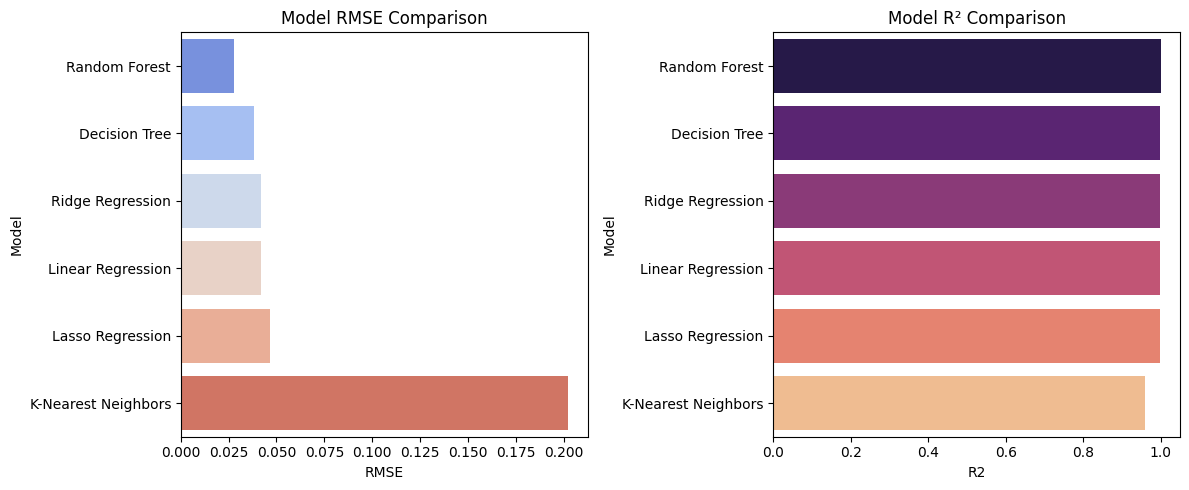


 Best model 'Random Forest' saved to random_forest_model.pkl.


In [27]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#  Load scaled data if not already loaded
df = pd.read_csv(r'd:\extracted\scaled_data.csv')

#  Feature and target separation
x = df.drop(columns=['Global_active_power'])
y = df['Global_active_power']

#  Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50,random_state=42)
}

# Evaluation function
def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}:")
    print(f"→ RMSE: {rmse:.4f}")
    print(f"→ MAE: {mae:.4f}")
    print(f"→ R²: {r2:.4f}")

    return {
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Train & evaluate all models
results = []
for name, model in models.items():
    result = evaluate_model(name, model, x_train, y_train, x_test, y_test)
    results.append(result)

# Display comparison table
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\n Model Comparison:")
display(results_df)

# Visualization
plt.figure(figsize=(12, 5))

# RMSE barplot
plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x='RMSE', y='Model', palette='coolwarm')
plt.title('Model RMSE Comparison')

# R² barplot
plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x='R2', y='Model', palette='magma')
plt.title('Model R² Comparison')

plt.tight_layout()
plt.show()

# Save the best performing model (lowest RMSE)
best_model_name = results_df.iloc[0]['Model']
best_model = None

# Identify the best model based on RMSE
for name, model in models.items():
    if name == best_model_name:
        best_model = model
        break

# Train the best model again on the full dataset
best_model.fit(x_train, y_train)

# Save the best model to a pickle file
pickle_filename = f'{best_model_name.replace(" ", "_").lower()}_model.pkl'
pickle.dump(best_model, open(pickle_filename, 'wb'))
print(f"\n Best model '{best_model_name}' saved to {pickle_filename}.")

# Load the saved best model
loaded_model = pickle.load(open(pickle_filename, 'rb'))

# Test prediction with the loaded model
# Example input (excluding the target column 'Global_active_power')
# # Provide dummy values for all the features excluding 'Global_active_power' 
# # (19 features - 1 target column = 18 features)
# example_input = [[0.23, 235.5, 5.8, 1.2, 2.1, 0.5, 2022, 5, 17, 14, 30, 0, 0, 1, 0, 0, 1, 0, 0]]

# # Create a DataFrame with the same columns as the training set (excluding 'Global_active_power')
# example_input_df = pd.DataFrame(example_input, columns=x_train.columns)

# # Predict with the model
# prediction = loaded_model.predict(example_input_df)

# print("\nPrediction from the loaded best model:", prediction)


In [28]:
import os
print(f"Model file size: {os.path.getsize(pickle_filename) / (1024 * 1024):.2f} MB")

Model file size: 5104.58 MB



🔍 Actual vs Predicted values (on test set):
     Actual  Predicted
0  0.505720   0.524289
1 -0.744062  -0.746101
2 -0.471504  -0.438708
3 -0.848211  -0.846881
4  0.361685   0.365806
5 -0.843779  -0.842538
6 -0.941280  -0.944781
7  1.316749   1.320915
8 -0.619971  -0.632114
9  0.882427   0.875203


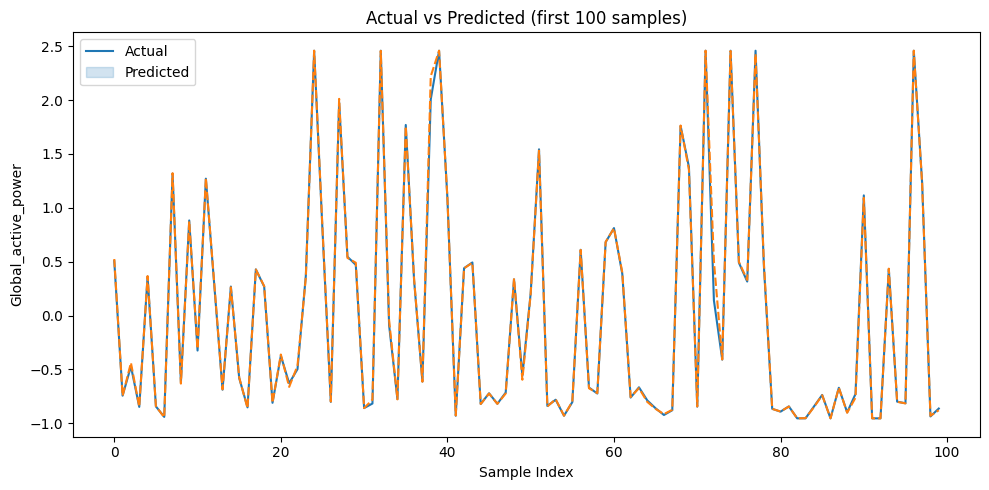

In [29]:
# Predict on the 20% test set
y_pred_test = loaded_model.predict(x_test)

# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_test
})

# Display first few rows
print("\n🔍 Actual vs Predicted values (on test set):")
print(comparison_df.head(10))  # show first 10 comparisons

# Optionally visualize
plt.figure(figsize=(10, 5))
sns.lineplot(data=comparison_df.head(100))  # Plot first 100 for clarity
plt.title('Actual vs Predicted (first 100 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Global_active_power')
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.show()
# scaled units not in kw

C:\Users\ASHWINI MURALIDHARAN\AppData\Local\Temp\ipykernel_37724\3392433370.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


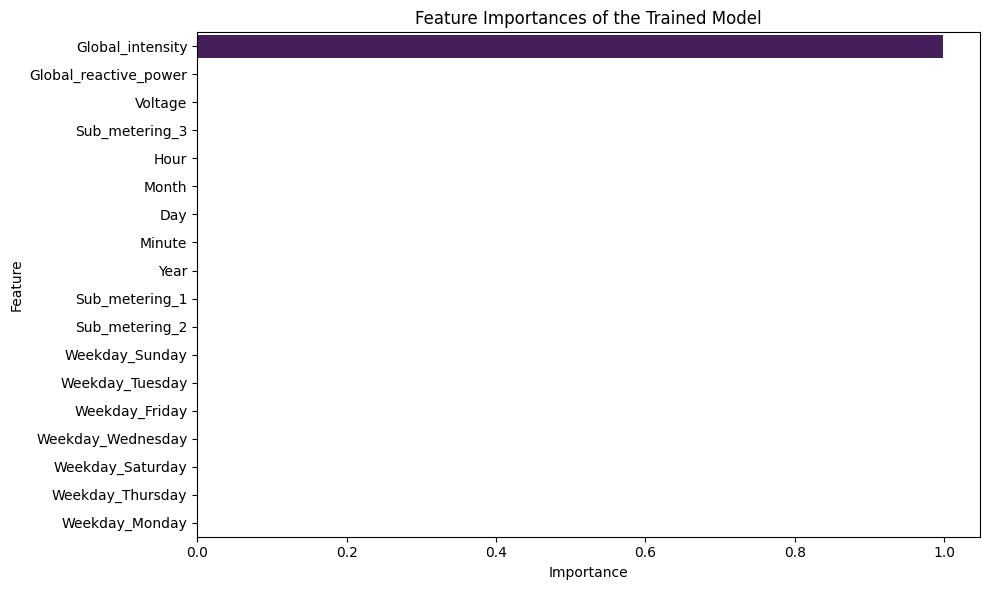

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the model supports feature importances # hasattr attribute to inspect object
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances from the trained model
    feature_importances = best_model.feature_importances_

    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({
        'Feature': x_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importances of the Trained Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

else:
    print(f" The model '{best_model_name}' does not support feature importances.")


In [43]:
# Global_active_power (kW): The total active power consumed in the household.
# Global_intensity (A): The average current intensity.

correlation = df[['Global_active_power', 'Global_intensity']].corr()
print("Correlation between Global_active_power and Global_intensity:")
print(correlation)

# The correlation between `Global_active_power` and `Global_intensity` is extremely high, with a value of **0.998718**. 
# This indicates a very strong positive linear relationship between the two variables.

Correlation between Global_active_power and Global_intensity:
                     Global_active_power  Global_intensity
Global_active_power             1.000000          0.998718
Global_intensity                0.998718          1.000000


In [44]:
# Predict Global_active_power in kW using the trained model
predicted_power_kw = model.predict(data_features)

# Add predictions to the original DataFrame
data['Predicted_Global_active_power_kW'] = predicted_power_kw

# Display the first few rows of actual vs predicted values
print(data[['Global_active_power', 'Predicted_Global_active_power_kW']].head())

   Global_active_power  Predicted_Global_active_power_kW
0             2.457951                          2.456212
1             2.457951                          2.455518
2             2.457951                          2.456235
3             2.457951                          2.456212
4             2.457951                          2.456128


In [ ]:
# Additional if having memory issue
# When pickle loading fails you can save the train model in joblib(for large dataset) -> Alternate for pickle

In [30]:
# Re-train and save the model (Due to memory error while loading pickle)
from sklearn.ensemble import RandomForestRegressor
import joblib

# Define a constrained Random Forest
optimized_rf = RandomForestRegressor(
    n_estimators=50,        # fewer trees
    max_depth=12,           # avoid massive trees
    min_samples_split=10,   # stop over-splitting
    random_state=42,
    n_jobs=-1               # use all cores
)

# Train and save with joblib
optimized_rf.fit(x_train, y_train)
joblib.dump(optimized_rf, "optimized_rf.joblib")

['optimized_rf.joblib']

In [33]:
import joblib
model = joblib.load("optimized_rf.joblib")

In [34]:
import pandas as pd

# Load your dataset
data = pd.read_csv(r'd:\extracted\scaled_data.csv')

# Inspect the dataset columns
print(data.columns)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday',
       'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday',
       'Weekday_Wednesday'],
      dtype='object')


In [35]:
print("Number of features the model expects:", model.n_features_in_)

Number of features the model expects: 18


In [36]:
print(data.columns)  # Print the column names
print("Number of features in the dataset:", len(data.columns))

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday',
       'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday',
       'Weekday_Wednesday'],
      dtype='object')
Number of features in the dataset: 19


In [37]:
# Remove 'Global_active_power' since it is the target variable
data_features = data.drop(columns=['Global_active_power'])

# Now df_features contains the input features (18 features, not including 'Global_active_power')
print("Columns used for prediction:", data_features.columns)

# Make predictions using the model
predictions = model.predict(data_features)

# Print the predictions
print("Predictions:", predictions)


Columns used for prediction: Index(['Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Year', 'Month',
       'Day', 'Hour', 'Minute', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')
Predictions: [ 2.45621185  2.45551791  2.45623509 ... -0.15102874 -0.15181024
 -0.15181024]


In [38]:
#Post-Processing: Add Predictions to DataFrame:
# Assuming the DataFrame is named 'data' and you've made predictions
data['Predicted_Global_active_power'] = predictions

# Print or save the DataFrame with actual vs predicted values
print(data[['Global_active_power', 'Predicted_Global_active_power']].head())

   Global_active_power  Predicted_Global_active_power
0             2.457951                       2.456212
1             2.457951                       2.455518
2             2.457951                       2.456235
3             2.457951                       2.456212
4             2.457951                       2.456128


In [39]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'Global_active_power' is the actual target variable in 'data'
actual_values = data['Global_active_power']

# Calculate metrics
mse = mean_squared_error(actual_values, predictions)
mae = mean_absolute_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.0011242120410424163
Mean Absolute Error: 0.01772533165777599
R² Score: 0.9988757879589576


In [40]:
#Save the Predictions to a CSV File:
data.to_csv('predictions_output.csv', index=False)

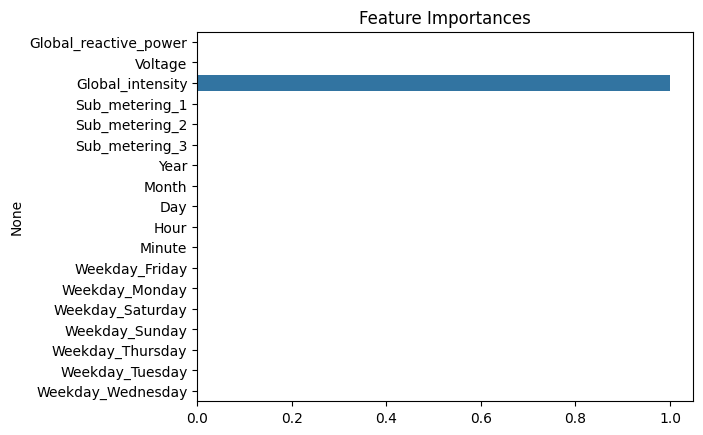

In [41]:
import joblib
import pandas as pd  # Import pandas
import seaborn as sns  # Import Seaborn for plotting
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Load the optimized Random Forest model
optimized_rf = joblib.load("optimized_rf.joblib")

# Reload the dataset to ensure 'data' is defined
data = pd.read_csv(r'd:\extracted\scaled_data.csv')

# Define data_features
data_features = data.drop(columns=['Global_active_power'])

# Get feature importances
importances = optimized_rf.feature_importances_
features = data_features.columns

# Plot feature importances
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()